<a href="https://colab.research.google.com/github/ngonam2403/test_202007/blob/master/VEF_Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kiểm tra working directory ~ nơi chứa dữ liệu

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'sample_data']

Google Colab đang trỏ vào một thư mục nào đó mà ta không biết, bây giờ cần đưa working directory về thư mục bên trong Google Drive, mà ta thấy quen thuộc.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
#chuyển về thư mục data bên trong Google Drive.
os.chdir('/content/gdrive/My Drive/Colab Notebooks/data')

In [ ]:
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/data'

In [35]:
#trong thư mục data này, ta để sẵn các file dữ liệu mà google colab sẽ gọi vào.
os.listdir()

['application_train.csv',
 'bureau.csv',
 'application_test.csv',
 'bureau_balance.csv']

Đến hết bước này, ta đảm bảo file google colab này đang trỏ vào thư mục /gdrive/My Drive/Colab Notebooks/data để lấy dữ liệu, và nó chỉ thực hiện bên trong thư mục đó thôi. Ta để các file dữ liệu liên quan trong thư mục này: application_train, application_test...

# Import & Read data

In [ ]:
import pandas as pd 

In [ ]:
data = pd.read_csv('application_train.csv')
#file application_train.csv đang nằm ở thư mục làm việc hiện tại, nên google colab trỏ vào dễ dàng, không lỗi.

In [ ]:
print('Training data shape: ', data.shape)

Training data shape:  (307511, 122)


In [ ]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# EDA

In [ ]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

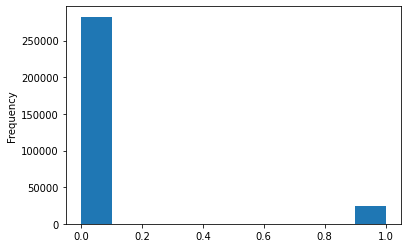

In [ ]:
data['TARGET'].astype(int).plot.hist();

## Xem missing data

In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [36]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(5)

Your selected dataframe has 122 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4


In [ ]:
(data['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## Xem histogram

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

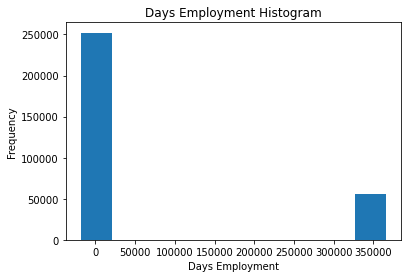

In [ ]:
data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

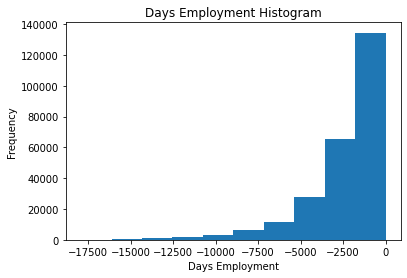

In [ ]:
# Replace the anomalous values with nan
data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

## Xem correlation giữa các biến X đối với biến Target

In [37]:
# Find correlations with the target and sort
correlations = data.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3     -0.178919
EXT_SOURCE_2     -0.160472
EXT_SOURCE_1     -0.155317
FLOORSMAX_AVG    -0.044003
FLOORSMAX_MEDI   -0.043768
Name: TARGET, dtype: float64
